###  Import

In [1]:
# Standard libraries
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline 

# Forecasting
from fbprophet import Prophet

In [2]:
# Import cleaned dataset
df = pd.read_csv('persistence/cleaned_data_2018-06-19.csv', parse_dates=True)
df.head()

,date,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0


### Prophet Model

In [3]:
# Prepare the data for prophet ingestion
df = df[['date', 'pm25']]
df.columns = ('ds', 'y')
df.head()

,ds,y
0,2010-01-02 00:00:00,129.0
1,2010-01-02 01:00:00,148.0
2,2010-01-02 02:00:00,159.0
3,2010-01-02 03:00:00,181.0
4,2010-01-02 04:00:00,138.0


In [4]:
# Instantiate a new prophet object
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, seasonality_mode='additive')

# Fit the model
m.fit(df)

In [5]:
# Specify days to be predicted
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
42117,2015-12-27 23:00:00
42118,2015-12-28 23:00:00
42119,2015-12-29 23:00:00
42120,2015-12-30 23:00:00
42121,2015-12-31 23:00:00


In [6]:
# Forecast
forecast = m.predict(future)
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
42117,2015-12-27 23:00:00,90.208606,-54.222216,232.755096,-90.857210,266.885381,-0.252441,-0.252441,-0.252441,13.913413,...,0.0,0.0,0.0,-4.660627,-4.660627,-4.660627,-9.505227,-9.505227,-9.505227,89.956165
42118,2015-12-28 23:00:00,90.196941,-55.027452,233.757577,-101.525443,279.826855,3.741089,3.741089,3.741089,13.913413,...,0.0,0.0,0.0,-3.637809,-3.637809,-3.637809,-6.534515,-6.534515,-6.534515,93.938030
42119,2015-12-29 23:00:00,90.185277,-55.832689,234.809764,-85.716862,292.875033,10.290788,10.290788,10.290788,13.913413,...,0.0,0.0,0.0,-0.436677,-0.436677,-0.436677,-3.185948,-3.185948,-3.185948,100.476065
42120,2015-12-30 23:00:00,90.173613,-57.183871,235.648422,-80.924306,297.996521,13.171925,13.171925,13.171925,13.913413,...,0.0,0.0,0.0,-1.222544,-1.222544,-1.222544,0.481057,0.481057,0.481057,103.345538
42121,2015-12-31 23:00:00,90.161948,-58.046287,236.232152,-84.722342,288.267807,17.762884,17.762884,17.762884,13.913413,...,0.0,0.0,0.0,-0.550137,-0.550137,-0.550137,4.399608,4.399608,4.399608,107.924832


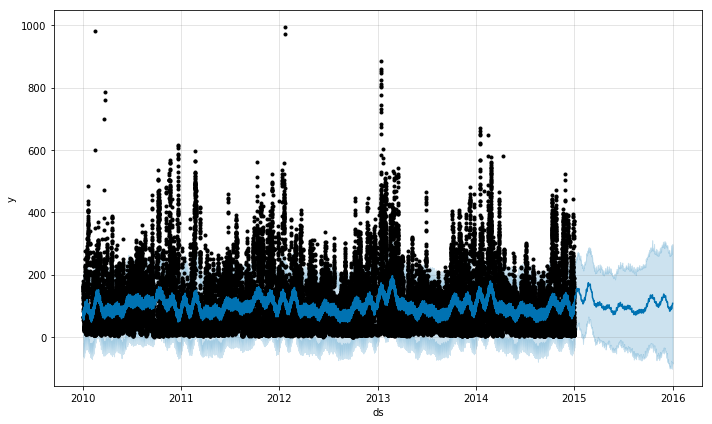

In [7]:
# Plot the forecast
fig1 = m.plot(forecast)

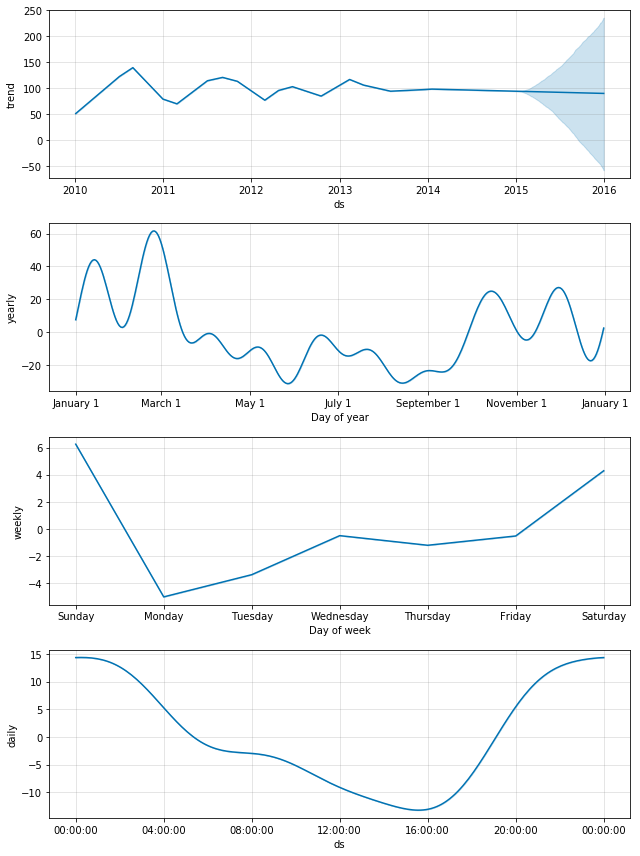

In [8]:
# Plot the forecast components
fig2 = m.plot_components(forecast)